# Insurance Data Analytics- Exploratory Data Analysi (EDA)
  - Goal: To Develop a foundational understanding of the data, assess its quality, and uncover initial patterns in risk and profitability


##🛠️ Setup & Imports
We load the necessary packages and prepare the notebook for data profiling and EDA.

In [1]:
# Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import uuid
from datetime import datetime
#from IPython.display import display
import csv
from tabulate import tabulate
# Set plot style for better visualization
#plt.style.use('seaborn')
#sns.set_palette("deep")

ModuleNotFoundError: No module named 'seaborn'

## 1. Data Understanding and summarization 
   - loading of Data
   - Understanding of data

In [6]:
# Data loading  and Displaying same column 
df = pd.read_csv('F:/Insurance_Risk-Analysis_Predictive_Modelling/data/output2.csv', dtype={32: object, 37: object})
df.head()
#df = pd.read_csv('F:/Insurance_Risk-Analysis_Predictive_Modelling/data/output2.csv', low_memory=False)



,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## 2. Basic Statistical summarization
  - Data structure (to know  Data types in each column)

In [ ]:
# Print the column names and data types
print("=== Data Structure ===")
print(df.info())


=== Data Structure ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Prov

- Descriptive Statistics

In [ ]:
print("\n=== Descriptive Statistics ===")
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 
                  'Cylinders', 'cubiccapacity', 'kilowatts' , 'NumberOfDoors']
print(df[numerical_cols].describe())


=== Descriptive Statistics ===
       TotalPremium   TotalClaims    SumInsured  CustomValueEstimate  \
count  1.000098e+06  1.000098e+06  1.000098e+06         2.204560e+05   
mean   6.190550e+01  6.486119e+01  6.041727e+05         2.255311e+05   
std    2.302845e+02  2.384075e+03  1.508332e+06         5.645157e+05   
min   -7.825768e+02 -1.200241e+04  1.000000e-02         2.000000e+04   
25%    0.000000e+00  0.000000e+00  5.000000e+03         1.350000e+05   
50%    2.178333e+00  0.000000e+00  7.500000e+03         2.200000e+05   
75%    2.192982e+01  0.000000e+00  2.500000e+05         2.800000e+05   
max    6.528260e+04  3.930921e+05  1.263620e+07         2.655000e+07   

           Cylinders  cubiccapacity      kilowatts  NumberOfDoors  
count  999546.000000  999546.000000  999546.000000  999546.000000  
mean        4.046642    2466.743258      97.207919       4.019250  
std         0.294020     442.800640      19.393256       0.468314  
min         0.000000       0.000000       0.000

##   3.Data Quality Assasement
 -  missing value in each document
 -  Duplicates

In [ ]:
# Data Quality Assessment
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())


=== Missing Values ===
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64
Number of duplicates: 0


## 4. Key column Calculation 
-  Total claim:is total claim request due to an insured event
-  Total Premium: is the amount of total policy holder pays for insurance coverage  
-  Over all loss ratio: indicating profitability or TotalClaim/TotalPremium

In [ ]:
# Calculation of Tatal Claim , total premium ans over all ratio
total_claim     = df['TotalClaims'].sum()
total_premium   = df['TotalPremium'].sum()
loss_ratio      = total_claim / total_premium
summary = pd.DataFrame({
    'Metric': [
        'Total Claims',
        'Total Premium',
        'Overall Loss Ratio'
    ],
    'Value': [
        total_claim,
        total_premium,
        loss_ratio
    ]
})

# Optionally format the loss ratio as a percentage
summary = pd.DataFrame({
    'Metric':    ['Total Claims', 'Total Premium', 'Overall Loss Ratio'],
    'Value':     [total_claim, total_premium, loss_ratio],
    'Formatted': [
        f"{total_claim:,.0f}",
        f"{total_premium:,.0f}",
        f"{loss_ratio:.2%}"
    ]
})
print("Key calculation over same Important column ")
print("===================================================")
print(summary)

Key calculation over same Important column 
               Metric         Value   Formatted
0        Total Claims  6.486755e+07  64,867,546
1       Total Premium  6.191156e+07  61,911,563
2  Overall Loss Ratio  1.047745e+00     104.77%


In [9]:
# key calculation 
print('key column calculation===')
total_claim =df['TotalClaims'].sum()
print("Total cLaims", "=",total_claim)
total_Premium = df['TotalPremium'].sum()
print("Total premium", "=",total_Premium)
loss_ratio= total_claim/total_Premium
print("over all loss ratio","=",loss_ratio)


key column calculation===
Total cLaims = 64867546.17070174
Total premium = 61911562.69643226
over all loss ratio = 1.0477452570332202


## 5. Loss Ratio by Province, VehicleType, and Gender
-  loss Ratio By Province 
-  loss Ratio By VehicleType
-  Loss Ratio BY Gender

In [ ]:
# Calculate Overall Loss Ratio
print(f"\nOverall Loss Ratio: {loss_ratio:.2f}")

# Loss Ratio by Province, VehicleType, and Gender
loss_ratio_by_province = df.groupby('Province').apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum() if x['TotalPremium'].sum() != 0 else 0,
    include_groups=False
).reset_index(name='LossRatio')
loss_ratio_by_vehicle = df.groupby('VehicleType').apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum() if x['TotalPremium'].sum() != 0 else 0,
    include_groups=False
).reset_index(name='LossRatio')
loss_ratio_by_gender = df.groupby('Gender').apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum() if x['TotalPremium'].sum() != 0 else 0,
    include_groups=False
).reset_index(name='LossRatio')

table_data = []
table_data.extend([["Province", row['Province'], f"{row['LossRatio']:.2f}"] 
                   for _, row in loss_ratio_by_province.iterrows()])
table_data.extend([["VehicleType", row['VehicleType'], f"{row['LossRatio']:.2f}"] 
                   for _, row in loss_ratio_by_vehicle.iterrows()])
table_data.extend([["Gender", row['Gender'], f"{row['LossRatio']:.2f}"] 
                   for _, row in loss_ratio_by_gender.iterrows()])

# Define headers for the table
headers = ["Category", "Value", "Loss Ratio"]

# Print tabulated output
print("\n=== Loss Ratios by Province, VehicleType, and Gender ===")
print(tabulate(table_data, headers=headers, tablefmt='grid'))
# Display Loss Ratio by Gender
print("\n=== Loss Ratio by Gender ===")
print(loss_ratio_by_gender.to_string(index=False))


Overall Loss Ratio: 1.05

=== Loss Ratio by Gender ===
       Gender  LossRatio
       Female   0.821879
         Male   0.883910
Not specified   1.059311


In [7]:
# Loss Ratio by province
print("Loss Ratio By province")
print("===================================")
loss_ratio_by_province = df.groupby('Province').apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum() if x['TotalPremium'].sum() != 0 else 0,
     include_groups=False
).reset_index(name='LossRatio')
print(loss_ratio_by_province.to_string(index=False))
# Loss ratio by vehicle 
print("Loss Ratio By Vehicle")
print("===================================")
loss_ratio_by_vehicle = df.groupby('VehicleType').apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum() if x['TotalPremium'].sum() != 0 else 0,
     include_groups=False
).reset_index(name='LossRatio')
print(loss_ratio_by_vehicle.to_string(index=False))
print("Loss Ratio By Gender")
print("===================================")
loss_ratio_by_gender = df.groupby('Gender').apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum() if x['TotalPremium'].sum() != 0 else 0, 
    include_groups=False
).reset_index(name='LossRatio')
print(loss_ratio_by_gender.to_string(index=False))

Loss Ratio By province
     Province  LossRatio
 Eastern Cape   0.633813
   Free State   0.680758
      Gauteng   1.222018
KwaZulu-Natal   1.082693
      Limpopo   0.661199
   Mpumalanga   0.720897
   North West   0.790367
Northern Cape   0.282699
 Western Cape   1.059472
Loss Ratio By Vehicle
      VehicleType  LossRatio
              Bus   0.137292
 Heavy Commercial   1.628112
 Light Commercial   0.232066
Medium Commercial   1.050251
Passenger Vehicle   1.048198
Loss Ratio By Gender
       Gender  LossRatio
       Female   0.821879
         Male   0.883910
Not specified   1.059311


# 6. Univariant  Analysis
-  Numerical feature distributions 
-  Categorical feature distributions

NameError: name 'sns' is not defined

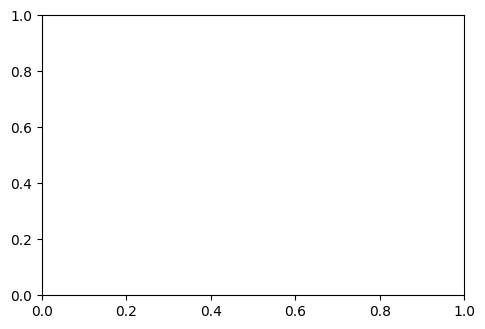

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['TotalPremium', 'TotalClaims', 'CustomValueEstimate'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('distributions.png')
plt.close()